<a href="https://colab.research.google.com/github/mentheshreya/Machine-Learning-Lab/blob/main/ML_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SHREYA MENTHE
# PRN: 124B2B003
from google.colab import files
uploaded = files.upload()

Saving winequalityN.csv to winequalityN.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df.shape

(6497, 13)

In [ ]:
#  Handle Missing Values (Vectorized Approach)
print("Filling missing values with column medians")

# Calculate medians for all numeric columns and fill NaNs in one step
df.fillna(df.median(numeric_only=True), inplace=True)

print("Missing values handled.")
print(f"Total remaining missing values: {df.isnull().sum().sum()}")

Filling missing values with column medians
Missing values handled.
Total remaining missing values: 0


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
# The mapping will be {Red: 0, White: 1}
print("\nTarget variable 'type' encoded: Red=0, White=1")


Target variable 'type' encoded: Red=0, White=1


In [ ]:
#Define Features (X) and Target (y)
X = df.drop('type', axis=1)
y = df['type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features have been scaled.")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Features have been scaled.
Training set shape: (4872, 12)
Test set shape: (1625, 12)


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)
print("Model training complete! ")
svm_model

Model training complete! 


SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    matthews_corrcoef
)

svm_pred = svm_model.predict(X_test_scaled)
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Overall Accuracy: {svm_accuracy:.4f}\n")

Overall Accuracy: 0.9945



In [ ]:
print("Classification Report")
report = classification_report(y_test, svm_pred, target_names=['Red Wine (0)', 'White Wine (1)'])
print(report)

--- Classification Report ---
                precision    recall  f1-score   support

  Red Wine (0)       0.99      0.99      0.99       400
White Wine (1)       1.00      1.00      1.00      1225

      accuracy                           0.99      1625
     macro avg       0.99      0.99      0.99      1625
  weighted avg       0.99      0.99      0.99      1625



Confusion Matrix


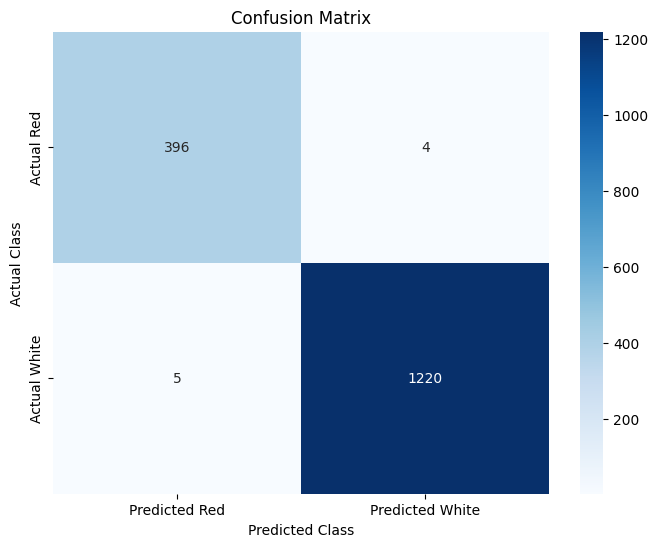

In [ ]:
print("Confusion Matrix")
cm = confusion_matrix(y_test, svm_pred)
tn, fp, fn, tp = cm.ravel()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Red', 'Predicted White'],
            yticklabels=['Actual Red', 'Actual White'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
print(f"True Negatives (TN) - Correctly predicted Red: {tn}")
print(f"False Positives (FP) - Incorrectly predicted White: {fp} (Type I Error)")
print(f"False Negatives (FN) - Incorrectly predicted Red: {fn} (Type II Error)")
print(f"True Positives (TP) - Correctly predicted White: {tp}")
print("\n")

True Negatives (TN) - Correctly predicted Red: 396
False Positives (FP) - Incorrectly predicted White: 4 (Type I Error)
False Negatives (FN) - Incorrectly predicted Red: 5 (Type II Error)
True Positives (TP) - Correctly predicted White: 1220




In [ ]:
# Matthews Correlation Coefficient (MCC): A robust metric for binary classification,
# especially on imbalanced data. Ranges from -1 (total disagreement) to +1 (perfect agreement).

mcc = matthews_corrcoef(y_test, svm_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Matthews Correlation Coefficient (MCC): 0.9851


In [ ]:
# Self learning
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

print("Training Naive Bayes")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_pred = nb_model.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes training complete.\n")

Training Naive Bayes
Naive Bayes training complete.



In [ ]:
print("Training Logistic Regression")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression training complete.\n")

Training Logistic Regression
Logistic Regression training complete.



In [ ]:
# Comparison table
comparison_data = {
    "Algorithm": ["Naive Bayes", "Logistic Regression", "SVM (Linear)"],
    "Accuracy": [nb_accuracy, lr_accuracy, svm_accuracy]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("Model Performance Comparison")
print(comparison_df)



Model Performance Comparison
             Algorithm  Accuracy
0         SVM (Linear)  0.994462
1  Logistic Regression  0.991385
2          Naive Bayes  0.975385


In [ ]:
print("\n--- Detailed Report for the Best Model (SVM) ---")
print(classification_report(y_test,svm_pred, target_names=['Red Wine', 'White Wine']))


--- Detailed Report for the Best Model (SVM) ---
              precision    recall  f1-score   support

    Red Wine       0.99      0.99      0.99       400
  White Wine       1.00      1.00      1.00      1225

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



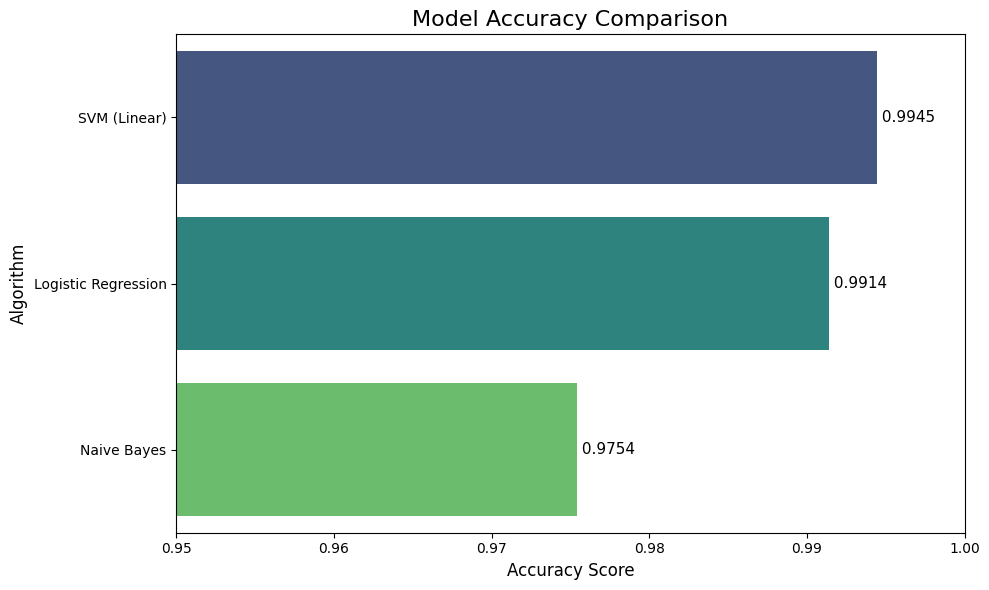

In [ ]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x="Accuracy",
    y="Algorithm",
    data=comparison_df,
    palette="viridis",
    hue="Algorithm", # Use hue to assign different colors and avoid issues with legends
    dodge=False,
    legend=False
)
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Accuracy Score", fontsize=12)
plt.ylabel("Algorithm", fontsize=12)

# Set the x-axis limits to zoom in on the high scores
plt.xlim(0.95, 1.0)

# Add the accuracy value labels on the bars
for index, value in enumerate(comparison_df['Accuracy']):
    plt.text(value, index, f' {value:.4f}', va='center', fontsize=11)

plt.tight_layout()
plt.show()